In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [4]:
!pwd

/c/Users/A2276061/Documents/GMM


In [5]:
df = pd.read_csv("claims-time.csv", index_col=0, parse_dates=True)

In [7]:
print(df.head())
#this time we parse from the begining

            Claims
Date              
2017-12-02      51
2017-11-02     102
2017-10-02     626
2017-09-02     705
2017-08-02     715


When we use df.plot() and plt.show(), matplotlib infers that we are making a time series, so we create a new data frame only with the two columns we want

<function matplotlib.pyplot.show>

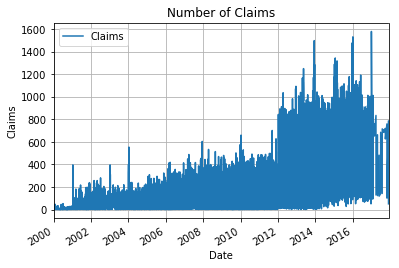

In [13]:
df.plot()
plt.title("Number of Claims")
plt.ylabel("Claims")
plt.grid(True)
plt.show

In [16]:
df_sort = df.sort_values(['Claims'], ascending=False)
df_sort.count()

Claims    5613
dtype: int64

In [19]:
print(df_sort.head())
#the days with more claims in history

            Claims
Date              
2017-01-02    1578
2016-01-06    1530
2013-12-12    1497
2015-12-21    1476
2016-01-08    1388


At a very first gaze, there's claims at the end of the year and the begining, so weird

With the series we can see the behavior of the number of claims over the time, we can start to have the next two considerations

The series shape is logical?:
- 1 The number of claims is growing, is it logical if the number of sinisters and the number of insured is growing at the same rate
- 2 We should see the frequency on every month or even periods
- 3 We will make a variance method to deprecate all those more than 10 days for example, in order of the variance measure after this, plot again

In [21]:
#let's see all days in negatives we have
df[df['Claims'] < 0].count()

Claims    0
dtype: int64

In [23]:
df.describe()

,Claims
count,5613.000000
mean,264.746125
std,283.022884
min,1.000000
25%,35.000000
50%,171.000000
75%,352.000000
max,1578.000000


In [24]:
#The rule we gonna use is excluding all the data with days more than 2 estandart deviatin_
two_dev = 2*df.std().astype(int)
two_dev

Claims    566
dtype: int32

In [26]:
df1 = df[df['Claims'] < 566]
df1.count()

Claims    4595
dtype: int64

In [33]:
#We have 4595 from 5613 
df1.count()/df.count()*100

Claims    81.863531
dtype: float64

<function matplotlib.pyplot.show>

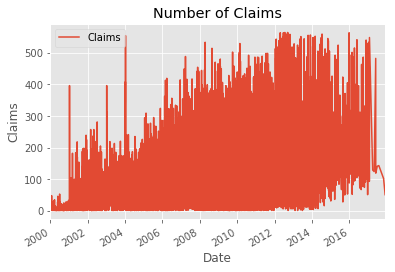

In [31]:
mpl.style.use('ggplot')
df1.plot()
plt.title("Number of Claims")
plt.ylabel("Claims")
plt.grid(True)
plt.show

This one makes more sense

In [34]:
df1.describe()

,Claims
count,4595.000000
mean,148.367791
std,135.523269
min,1.000000
25%,17.000000
50%,120.000000
75%,245.000000
max,564.000000


In [49]:
#pimped
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
print(df1.describe().unstack()) #unstack makes a table if we have many features

Claims  count    4595.000
        mean      148.368
        std       135.523
        min         1.000
        25%        17.000
        50%       120.000
        75%       245.000
        max       564.000
dtype: float64


In [ ]:
#Some more optional features

#In case we have classes
class_counts = data.groupby('class').size()
print(class_counts)

#correlations
correlations = data.corr(method='pearson')
print(correlations)

skew = data.skew()
print(skew)

First of all, the mean changes a lot

In [36]:
#print(df.mean(),df1.mean())
print((df1.mean()/df.mean())-1)

Claims   -0.439585
dtype: float64


On average it happens 148 +-135 claims a day, it is easy to see that the interval contains values over cero

From here we may set some questions about it  

- Claims grouped by disease
- Claims grouped by age, gender
- Claims grouped by participant (agent, doctor, ofice)
- Claims grouped by season
     

In order to have some insight about the time series we gonna wrang the dates

In [37]:
df.dtypes
#it is such a shame to notice here that the variable In is an object, we need datetime instead

Claims    int64
dtype: object

Well, it is not very clear as we see, is it possible to check it out aggregated by month and year

In [44]:
df1['Claims']

Date
2017-12-02     51
2017-11-02    102
2017-06-02    119
2017-05-02    124
2017-04-02    129
2017-01-30    548
2017-01-29     97
2017-01-28     97
2017-01-27     93
2017-01-26    457
2017-01-22    138
2017-01-21    167
2017-01-19    525
2017-01-15    113
2017-01-14    117
2017-01-13    533
2017-08-01    143
2017-07-01    141
2017-06-01    482
2017-01-01    115
2016-12-30    369
2016-12-29    155
2016-12-28    289
2016-12-27    521
2016-12-25     51
2016-12-24     75
2016-12-23    413
2016-12-18    196
2016-12-17    268
2016-12-16    528
             ... 
2000-03-03      3
2000-02-03     27
2000-02-29      2
2000-02-28      4
2000-02-25     12
2000-02-23      1
2000-02-22      1
2000-02-21     29
2000-02-15     19
2000-02-14      4
2000-11-02     28
2000-09-02      1
2000-08-02      2
2000-07-02      1
2000-04-02      8
2000-01-02      6
2000-01-28      2
2000-01-27      2
2000-01-26     48
2000-01-25      6
2000-01-24      4
2000-01-19      3
2000-01-18     15
2000-01-17      2
2000-

In [46]:
dfy = df1.groupby(df1['Claims'].map(lambda x: x.year)).mean()
dfy.head()

AttributeError: 'int' object has no attribute 'year'

<function matplotlib.pyplot.show>

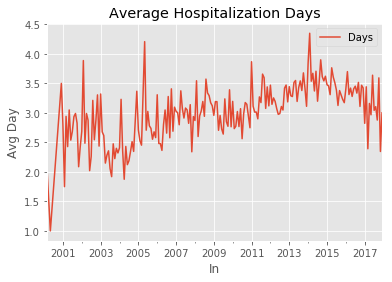

In [198]:
dfm.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

Now what about years

In [200]:
dfy = df3.groupby(df3['In'].map(lambda x: x.year)).mean()
dfy.head()

,Days
In,
2000,2.500000
2001,2.650817
2002,2.814274
2003,2.468085
2004,2.535714


<function matplotlib.pyplot.show>

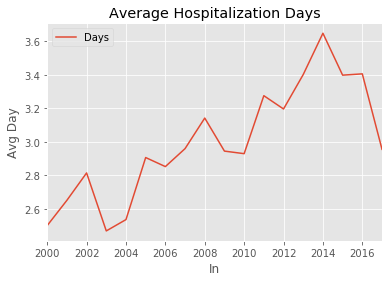

In [201]:
dfy.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

Hospitalizations Average Days Over The Years

(array([  2.40000000e+01,   5.60000000e+02,   4.16600000e+03,
          1.57400000e+04,   3.09110000e+04,   2.98990000e+04,
          1.47510000e+04,   3.48700000e+03,   4.29000000e+02,
          3.30000000e+01]),
 array([-4.23630109, -3.38229416, -2.52828722, -1.67428029, -0.82027335,
         0.03373358,  0.88774052,  1.74174745,  2.59575439,  3.44976132,
         4.30376826]),
 <a list of 10 Patch objects>)

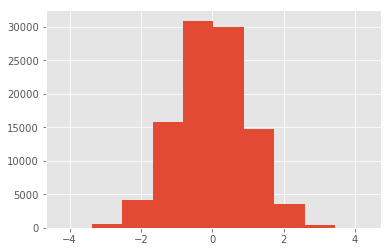

In [138]:
#this is just an example
mpl.style.available
[u'dark_background', u'grayscale', u'ggplot']
mpl.style.use('ggplot')
plt.hist(np.random.randn(100000))